# Random Forest Algorithm

<font style="font-size:18pt">
    <ul>
            <li>Ensemble of trees, like bagging<br><br>
                
            <li>Each tree uses a different subset of features <br><br>
            
            <li>Compare to bagging, all features are used<br><br>
            
            <li>Optimal number of features/tree is $\sqrt{n}$<br><br>
            
            <ii>Classification trees - majority vote
            <br><br>
            
            <li>Regression trees - average response <br><br>
        
    </ul>
    
</font>

### Load wine data from UCI

In [1]:
uci="http://archive.ics.uci.edu/"
mld="ml/machine-learning-databases/"
redcsv="wine-quality/winequality-red.csv"
wineurl=paste(uci,mld,redcsv,sep="")
wineurl

[1] "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [2]:
red.wine.data=read.csv(wineurl, header = TRUE, sep = ";")
colnames(red.wine.data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

## Test and training data

In [3]:
n=nrow(red.wine.data)
training.indices=sort(sample(1:n,.75*n)) 
train=red.wine.data[training.indices,]
#
# replace quality column with factors
#
train$quality = as.factor(train$quality)
#
# 25% for test
#
test=red.wine.data[-training.indices,]
ntrain = nrow(train)
ntrain

[1] 1199

In [5]:
install.packages("randomForest")

Installing package into ‘/home/mathman/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [6]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [7]:
rf.wine=randomForest(quality~., data=train)

In [8]:
summary(rf.wine)

                Length Class  Mode     
call               3   -none- call     
type               1   -none- character
predicted       1199   factor numeric  
err.rate        3500   -none- numeric  
confusion         42   -none- numeric  
votes           7194   matrix numeric  
oob.times       1199   -none- numeric  
classes            6   -none- character
importance        11   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y               1199   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [9]:
importance(rf.wine, type=1)

fixed.acidity
volatile.acidity
citric.acid
residual.sugar
chlorides
free.sulfur.dioxide
total.sulfur.dioxide
density
pH
sulphates
alcohol


In [10]:
importance(rf.wine,type=2)

,MeanDecreaseGini
fixed.acidity,58.12730
volatile.acidity,72.35791
citric.acid,53.71312
residual.sugar,54.73410
chlorides,61.59038
free.sulfur.dioxide,51.74846
total.sulfur.dioxide,84.18472
density,70.63859
pH,55.88391
sulphates,85.77440


In [11]:
rf.wine


Call:
 randomForest(formula = quality ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 30.19%
Confusion matrix:
  3 4   5   6  7 8 class.error
3 0 1   7   1  0 0   1.0000000
4 1 0  24  10  0 0   1.0000000
5 0 1 427 103  2 0   0.1988743
6 0 0 107 337 19 1   0.2737069
7 0 0  11  57 73 2   0.4895105
8 0 0   0   7  8 0   1.0000000

In [20]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [40]:
pre=predict(rf.wine,newdata=test)
pre.fact=as.factor(pre)
confusionMatrix(pre.fact, as.factor(test[,12]))

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   1  14 121  49   2   0
         6   0   3  26 117  29   1
         7   0   1   1   8  24   1
         8   0   0   0   0   1   1

Overall Statistics
                                          
               Accuracy : 0.6575          
                 95% CI : (0.6087, 0.7039)
    No Information Rate : 0.435           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4505          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity            0.0000    0.000   0.8176   0.6724   0.4286   0.3333
Specificity            1.0000    1.000   0.7381   0.7389   0.9680   0.9975
Pos Pred Value            NaN      NaN   0.6471   0.6648   0.6857   0.5000
Neg Pred Value 

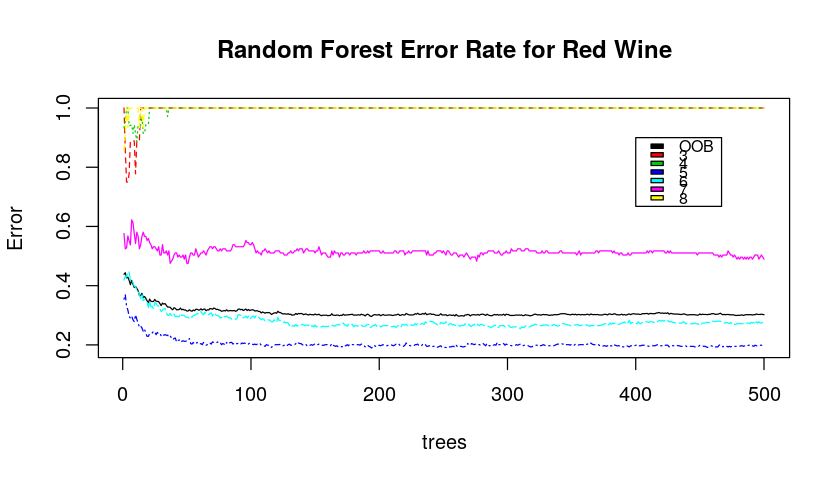

In [37]:
#pdf("Random-Forest-Error-Rate.pdf",width=7,height=4)
plot(rf.wine,col=1:7, main="Random Forest Error Rate for Red Wine")
options(repr.plot.width=7, repr.plot.height=4)
legend(400,.9, colnames(rf.wine$err.rate),col=1:7, cex=0.8,fill=1:7)
#dev.off()

In [39]:
as.factor(test[,12])

[1] 6 5 5 6 6 6 6 4 5 4 5 6 5 5 5 5 6 4 5 5 5 6 5 4 6 6 5 5 6 6 5 5 5 5 6 6 5
 [38] 5 5 4 6 5 5 5 7 6 7 6 6 5 6 6 6 7 5 7 5 6 6 5 5 6 5 6 6 5 6 5 6 6 5 7 6 6
 [75] 6 7 7 5 6 5 6 7 6 5 6 5 7 6 6 6 6 6 6 7 6 7 6 5 5 7 5 6 5 6 6 6 7 7 5 3 6
[112] 6 6 5 5 5 5 7 6 8 6 7 7 7 5 5 6 6 6 5 6 6 5 6 6 6 4 6 5 7 5 6 4 5 6 6 6 6
[149] 5 5 6 5 5 5 5 5 4 6 5 4 6 6 5 6 5 5 5 5 5 4 5 5 6 5 5 6 6 6 5 5 6 5 5 6 5
[186] 6 6 5 6 5 7 5 6 6 5 5 6 5 7 5 5 4 7 7 5 6 6 6 7 6 6 5 4 7 5 7 6 6 7 7 6 6
[223] 6 6 6 5 6 7 7 7 7 7 6 5 6 7 7 5 5 5 7 5 5 7 7 6 7 6 6 5 6 7 7 6 6 6 5 6 5
[260] 6 6 6 7 5 6 7 6 7 6 6 7 5 6 6 6 6 5 6 6 6 6 6 5 7 5 5 7 6 6 6 5 4 6 5 6 6
[297] 6 5 5 5 5 5 4 6 5 5 6 5 6 5 5 4 6 6 6 4 6 6 5 6 5 5 5 6 6 6 7 6 5 6 5 5 5
[334] 5 5 5 5 4 6 6 6 6 5 5 6 5 5 6 8 6 6 5 5 5 6 5 7 5 6 7 6 6 6 8 7 7 5 5 7 6
[371] 4 6 5 7 6 7 5 5 5 6 5 5 6 6 5 6 6 5 6 7 6 6 5 6 5 6 6 6 6 6
Levels: 3 4 5 6 7 8